<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB13_PART1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 13 : PART 1

1) Create the following data and write to a csv file: Generate 10 random points in each of the the following circles (i) centre at (3,3) and radius 2, (ii) centre at (7,7) and radius 2 (iii) centre at (11,11) and radius 2.  Plot the data as well.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Function to generate random points within a circle
def generate_data(center, radius, n):
    x_c, y_c = center
    points = []
    for i in range(n):
      theta = np.random.uniform(0, 2*np.pi)
      dist = np.random.uniform(0, 1)
      x = x_c + dist * np.cos(theta)
      y = y_c + dist * np.sin(theta)
      points.append((x,y))
    return points



(i) centre at (3,3) and radius 2 <br>
(ii) centre at (7,7) and radius 2 <br>
(iii) centre at (11,11) and radius 2

In [11]:
# Generate data points
data1 = generate_data((3,3), 2, 10)
data2 = generate_data((7,7), 2, 10)
data3 = generate_data((11,11), 2, 10)
total_data = data1 + data2 + data3

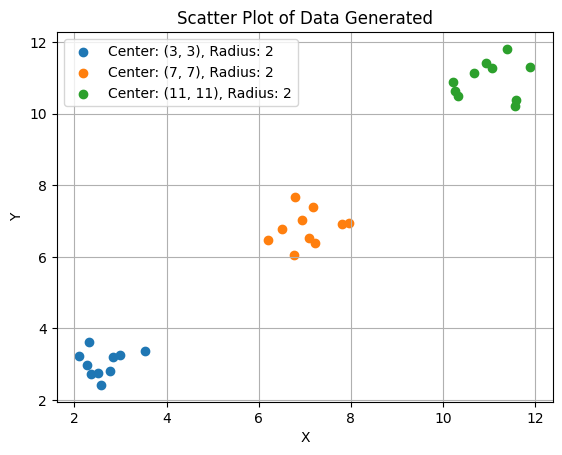

In [16]:
# Plot data
import matplotlib.pyplot as plt

# Extract x and y coordinates from the tuples
x1 = [coord[0] for coord in data1]
y1 = [coord[1] for coord in data1]
x2 = [coord[0] for coord in data2]
y2 = [coord[1] for coord in data2]
x3 = [coord[0] for coord in data3]
y3 = [coord[1] for coord in data3]
# Plot the coordinates
plt.scatter(x1, y1, label=f'Center: {(3,3)}, Radius: {2}')
plt.scatter(x2, y2, label=f'Center: {(7,7)}, Radius: {2}')
plt.scatter(x3, y3, label=f'Center: {(11,11)}, Radius: {2}')

#plt.scatter(points[:, 0], points[:, 1], label=f'Center: {center}, Radius: {radius}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data Generated')
plt.grid(True)
plt.legend()
plt.show()


In [17]:
# write to csv
import csv
csv_file = "gen_data.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x', 'y'])  # Write header
    for x, y in total_data:
        writer.writerow([x, y])


2)  Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5. Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.



In [18]:
import pandas as pd
df = pd.read_csv('gen_data.csv')
df.head()

,x,y
0,2.587524,2.423344
1,2.111008,3.220615
2,2.363820,2.722110
3,2.998565,3.262109
4,2.309362,3.608433


In [19]:
df.shape

(30, 2)

In [57]:
import numpy as np

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def kmeans(X, k):
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(1000):
        # Assign each point to the nearest centroid
        distances = []
        for x in X:
          c_dist = []
          for c in centroids:
            c_dist.append(euclidean_distance(x, c))
          distances.append(c_dist)
        distances = np.array(distances)
        labels = np.argmin(distances, axis=1)
        # Update centroids
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # calculate cost
    cost = 0
    for i, x in enumerate(X):
      cost+= euclidean_distance(centroids[labels[i]],x)
    cost /= len(X)

    return centroids, cost, labels


In [62]:
X = df.values
X.shape
x1 = X[:,0]
x2 = X[:,1]

In [65]:
# Apply K-means clustering for k=1
k=1
centroids1, cost1, labels1 = kmeans(X, k)

# Print centroids
print("Centroids:")
print(centroids1)
# print cost
print("Cost:")
print(cost1)

Centroids:
[[6.8889981  6.93638577]]
Cost:
4.0667107596006575


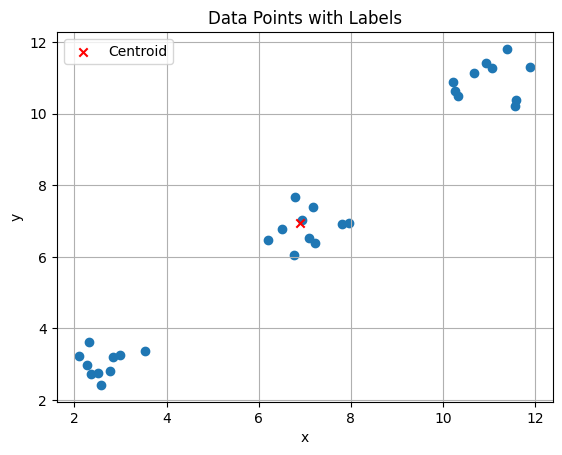

In [69]:
# Plot data points with labels
for label in set(labels1):
    indices = np.where(np.array(labels1) == label)
    plt.scatter(x1[indices], x2[indices])
# Mark centroid point
plt.scatter(*centroids1[0], color='red', label='Centroid', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Apply K-means clustering for k=2
k=2
centroids2, cost2, labels2 = kmeans(X, k)

# Print centroids and distances
print("Centroids:")
print(centroids2)
#print("Euclidean distances between centroids and points:")
print("Cost:")
print(cost2)

Centroids:
[[ 4.83913545  4.92867964]
 [10.98872339 10.95179805]]
Cost:
2.19386392244761


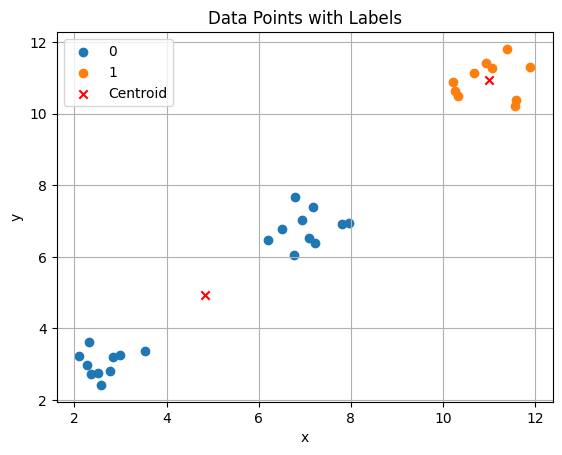

In [78]:
# Plot data points with labels
for label in set(labels2):
    indices = np.where(np.array(labels2) == label)
    plt.scatter(x1[indices], x2[indices], label = label)
# Mark centroid point
plt.scatter(*centroids2[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids2[1], color='red',  marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Apply K-means clustering for k=3
k=3
centroids3, cost3, labels3 = kmeans(X, k)

# Print centroids and distances
print("Centroids:")
print(centroids3)
#print("Euclidean distances between centroids and points:")
print("Cost:")
print(cost3)

Centroids:
[[10.98872339 10.95179805]
 [ 2.63137747  3.03880813]
 [ 7.04689344  6.81855115]]
Cost:
0.6144983964581718


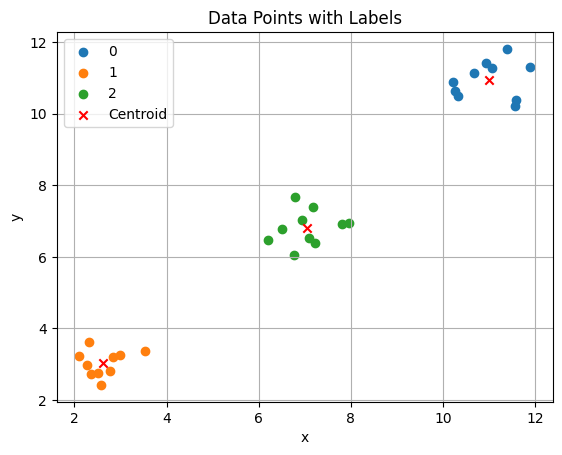

In [76]:
# Plot data points with labels
for label in set(labels3):
    indices = np.where(np.array(labels3) == label)
    plt.scatter(x1[indices], x2[indices], label = label)
# Mark centroid point
plt.scatter(*centroids3[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids3[1], color='red', marker='x')
plt.scatter(*centroids3[2], color='red', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Apply K-means clustering for k=4
k=4
centroids4, cost4, labels4 = kmeans(X, k)

# Print centroids
print("Centroids:")
print(centroids4)

print("Cost:")
print(cost4)

Centroids:
[[ 2.63137747  3.03880813]
 [ 7.04689344  6.81855115]
 [10.57642809 10.96766459]
 [11.60716632 10.92799824]]
Cost:
0.5515771838217878


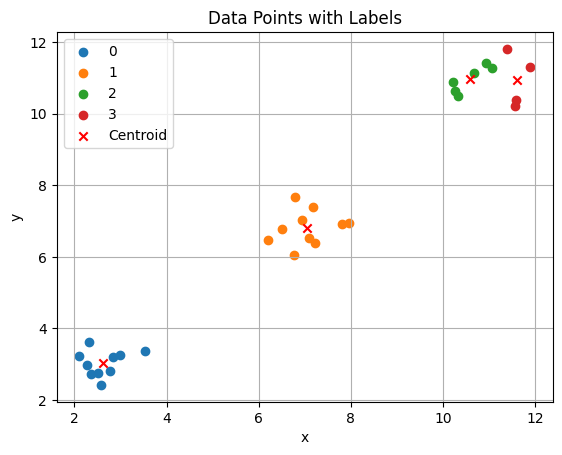

In [80]:
# Plot data points with labels
for label in set(labels4):
    indices = np.where(np.array(labels4) == label)
    plt.scatter(x1[indices], x2[indices], label = label)
# Mark centroid point
plt.scatter(*centroids4[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids4[1], color='red', marker='x')
plt.scatter(*centroids4[2], color='red', marker='x')
plt.scatter(*centroids4[3], color='red', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Apply K-means clustering for k=5
k=5
centroids5, cost5, labels5 = kmeans(X, k)

# Print centroids
print("Centroids:")
print(centroids5)

print("Cost:")
print(cost5)

Centroids:
[[10.82649976 10.80205474]
 [ 6.79005117  6.54259472]
 [11.6376179  11.55077126]
 [ 7.43215685  7.23248578]
 [ 2.63137747  3.03880813]]
Cost:
0.5173335203084104


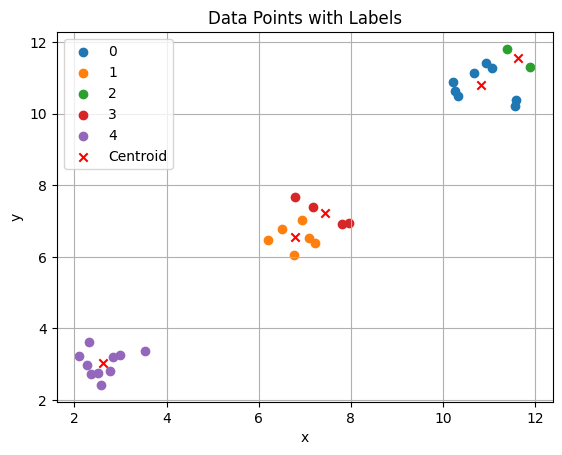

In [81]:
# Plot data points with labels
for label in set(labels5):
    indices = np.where(np.array(labels5) == label)
    plt.scatter(x1[indices], x2[indices], label = label)
# Mark centroid point
plt.scatter(*centroids5[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids5[1], color='red', marker='x')
plt.scatter(*centroids5[2], color='red', marker='x')
plt.scatter(*centroids5[3], color='red', marker='x')
plt.scatter(*centroids5[4], color='red', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

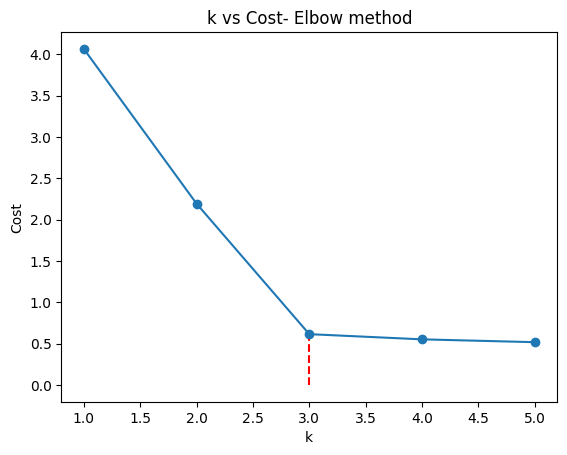

In [56]:
# plot the cost function for K varying from 1 to 5
k_vals = [1,2,3,4,5]
cost_vals = [cost1, cost2, cost3, cost4, cost5]
# Plot the line
plt.plot(k_vals, cost_vals, marker='o', linestyle='-')
plt.vlines(k_vals[2], ymin=0, ymax=cost_vals[3], color='red', linestyle='--')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('k vs Cost- Elbow method')
plt.show()

By Elbow method, best k is 3

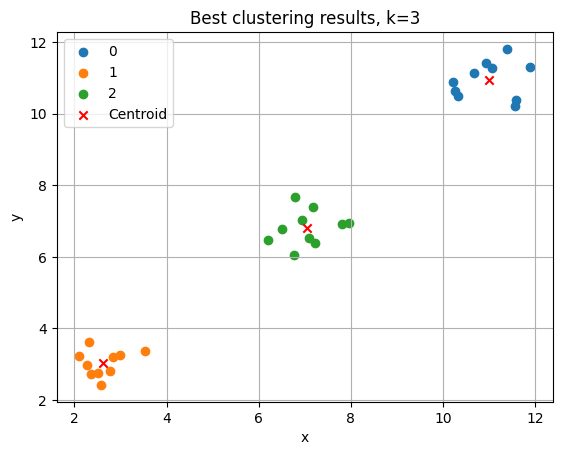

In [82]:
# Plot data points with labels
for label in set(labels3):
    indices = np.where(np.array(labels3) == label)
    plt.scatter(x1[indices], x2[indices], label = label)
# Mark centroid point
plt.scatter(*centroids3[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids3[1], color='red', marker='x')
plt.scatter(*centroids3[2], color='red', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Best clustering results, k=3')
plt.legend()
plt.grid(True)
plt.show()